In [10]:
!pip install pm4py
import pm4py
import inflect
from datetime import datetime
import pandas as pd
!pip install -U ortools
import os

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.2 -> 25.1
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.2 -> 25.1
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip


In [11]:
!pip install inflect


Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.2 -> 25.1
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip


Reading OCEL datasets.

In [12]:
ocel = pm4py.read_ocel2_json("order-management.json")

print(ocel)
ocel.get_extended_table()

Object-Centric Event Log (number of events: 21008, number of objects: 10840, number of activities: 11, number of object types: 6, events-objects relationships: 147385)
Activities occurrences: Counter({'pick item': 7659, 'place order': 2000, 'confirm order': 2000, 'pay order': 2000, 'item out of stock': 1544, 'reorder item': 1544, 'create package': 1128, 'send package': 1128, 'package delivered': 1128, 'payment reminder': 566, 'failed delivery': 311})
Object types occurrences (number of objects): Counter({'items': 7659, 'orders': 2000, 'packages': 1128, 'products': 20, 'employees': 18, 'customers': 15})
Unique activities per object type: Counter({'items': 11, 'products': 11, 'employees': 8, 'orders': 4, 'packages': 4, 'customers': 2})
Please use <THIS>.get_extended_table() to get a dataframe representation of the events related to the objects.


,ocel:eid,ocel:timestamp,ocel:activity,ocel:type:products,ocel:type:orders,ocel:type:items,ocel:type:customers,ocel:type:employees,ocel:type:packages
0,place_o-990001,2023-04-03 10:08:18+00:00,place order,"[Echo, iPhone 11 Pro]",[o-990001],"[i-880001, i-880003, i-880002]",[AlpenTech Innovations AG],NaN,NaN
1,pick_i-880003,2023-04-03 11:21:49+00:00,pick item,[iPhone 11 Pro],NaN,[i-880003],NaN,[Leah Tacke genannt Unterberg],NaN
2,place_o-990002,2023-04-03 14:36:55+00:00,place order,"[Kindle Paperwhite, iPad mini, MacBook Pro]",[o-990002],"[i-880006, i-880004, i-880005]",[AlpenTech Innovations AG],NaN,NaN
3,place_o-990003,2023-04-03 21:31:23+00:00,place order,"[Fire Stick, Kindle Paperwhite, iPhone X, iPad...",[o-990003],"[i-880007, i-880012, i-880010, i-880008, i-880...",[Celtica Green Farms Oy],NaN,NaN
4,pick_i-880001,2023-04-04 07:50:21+00:00,pick item,[Echo],NaN,[i-880001],NaN,[Leah Tacke genannt Unterberg],NaN
...,...,...,...,...,...,...,...,...,...
21003,deliver_p-661127,2024-05-28 10:49:37+00:00,package delivered,[iPhone X],NaN,[i-887529],NaN,[Yisong Zhang],[p-661127]
21004,create_p-661128,2024-05-31 23:00:00+00:00,create package,[Echo Dot],NaN,[i-887573],NaN,[Detlef Wetzeler],[p-661128]
21005,send_p-661128,2024-06-03 08:20:59+00:00,send package,[Echo Dot],NaN,[i-887573],NaN,[Viki Peeva],[p-661128]
21006,deliver_p-661128,2024-06-03 10:17:54+00:00,package delivered,[Echo Dot],NaN,[i-887573],NaN,[Viki Peeva],[p-661128]


Printing list of all objects and storing in array.

In [13]:
objects = ocel.objects
all_obj = objects["ocel:type"].unique();
print(all_obj)

['orders' 'items' 'packages' 'customers' 'products' 'employees']


In [14]:

filtered_ocel = pm4py.filtering.filter_ocel_object_types(ocel, {'order': ['create order', 'pay order'], 'item': ['create item', 'deliver item']})

# Print the filtered objects
print(filtered_ocel)

output_file_path = "filtered_ocel.jsonocel"

pm4py.write.write_ocel2_json(filtered_ocel, output_file_path)

Object-Centric Event Log (number of events: 0, number of objects: 0, number of activities: 0, number of object types: 0, events-objects relationships: 0)
Activities occurrences: Counter()
Object types occurrences (number of objects): Counter()
Unique activities per object type: Counter()
Please use <THIS>.get_extended_table() to get a dataframe representation of the events related to the objects.


In [15]:
import json
results = []
for obj_type in all_obj:
    for event_type in ocel.events["ocel:activity"].unique():
        filtered_ocel = pm4py.filtering.filter_ocel_object_types_allowed_activities(
            ocel,
            {obj_type : [event_type]}
        )
        log = pm4py.write.write_ocel2_json(filtered_ocel,output_file_path)
        # print(log)
        with open(output_file_path, 'r') as file:
          data = json.load(file)

        relationship_count = 0
        omap = {}
        for obj in data.get("objects", []):
          id = obj.get("id")
          otype = obj.get("type")
          omap[id] = otype
        for event in data.get("events", []):
          num_A = sum(1 for r in event["relationships"] if omap[r["objectId"]] == obj_type)
          relationship_count += num_A

        results.append((obj_type, event_type, relationship_count))
        print(f"{obj_type} - {event_type}: {relationship_count}")


orders - place order: 2000
orders - pick item: 0
orders - item out of stock: 0
orders - confirm order: 2000
orders - reorder item: 0
orders - pay order: 2000
orders - create package: 0
orders - send package: 0
orders - package delivered: 0
orders - failed delivery: 0
orders - payment reminder: 566
items - place order: 7659
items - pick item: 7659
items - item out of stock: 1544
items - confirm order: 7659
items - reorder item: 1544
items - pay order: 7659
items - create package: 7659
items - send package: 7659
items - package delivered: 7659
items - failed delivery: 2020
items - payment reminder: 2214
packages - place order: 0
packages - pick item: 0
packages - item out of stock: 0
packages - confirm order: 0
packages - reorder item: 0
packages - pay order: 0
packages - create package: 1128
packages - send package: 1128
packages - package delivered: 1128
packages - failed delivery: 311
packages - payment reminder: 0
customers - place order: 2000
customers - pick item: 0
customers - ite

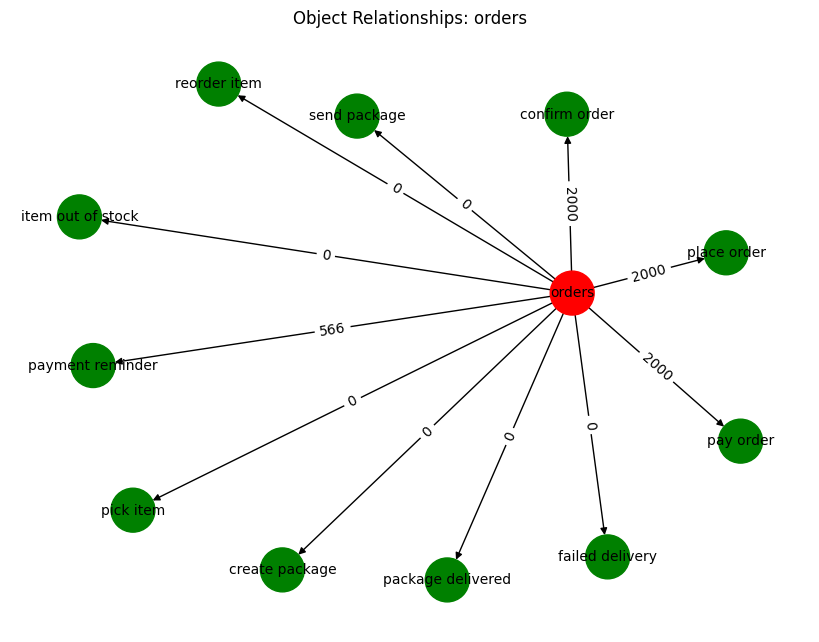

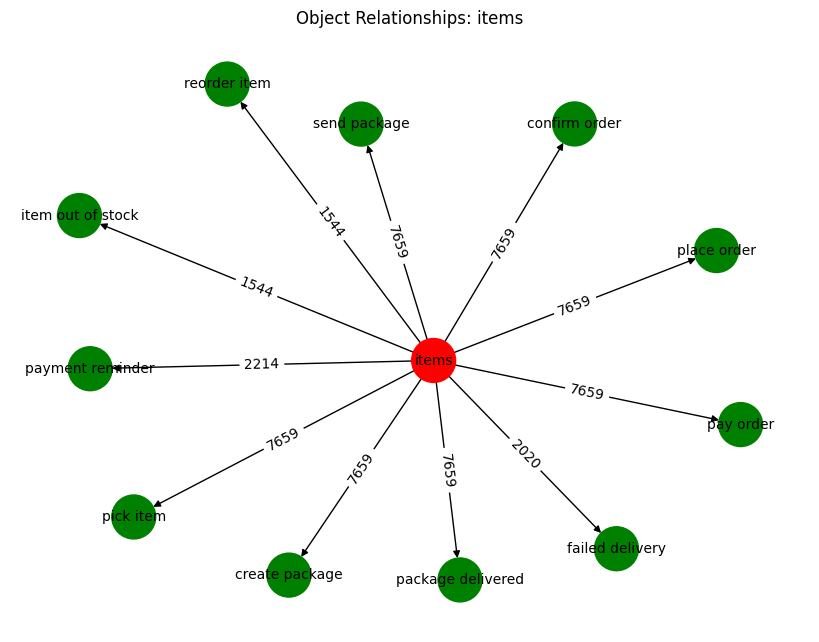

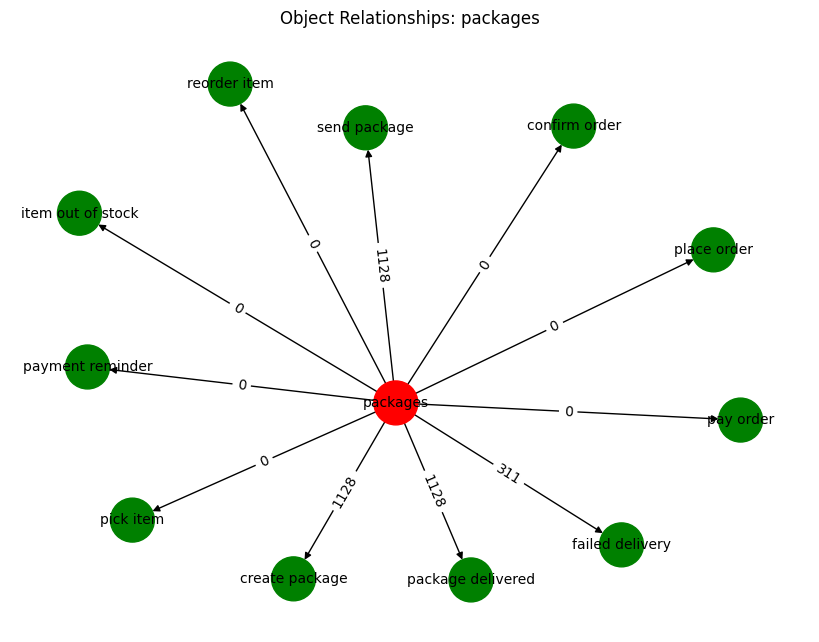

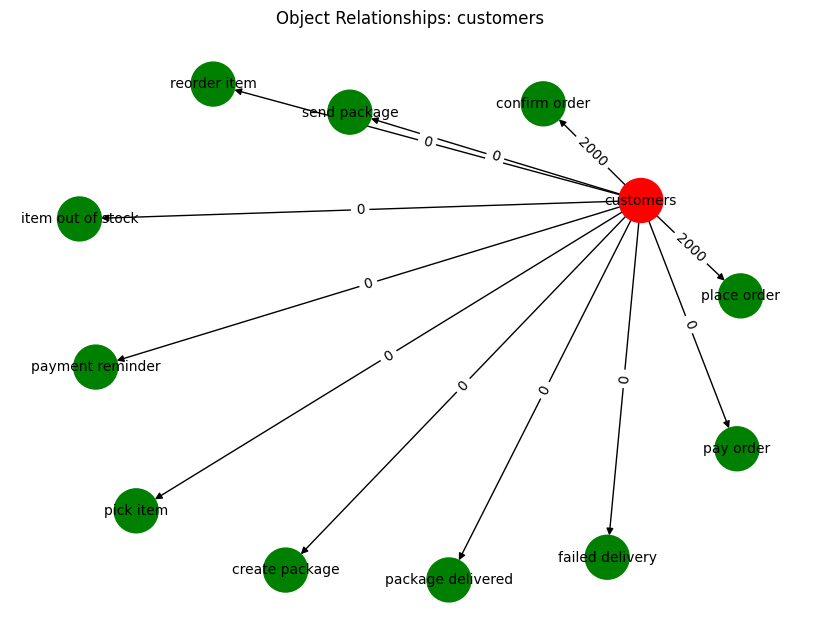

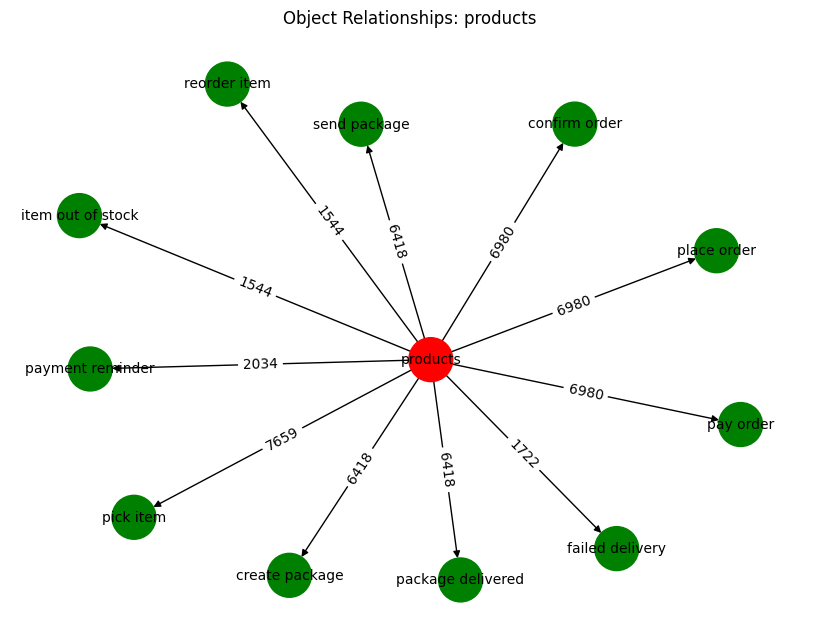

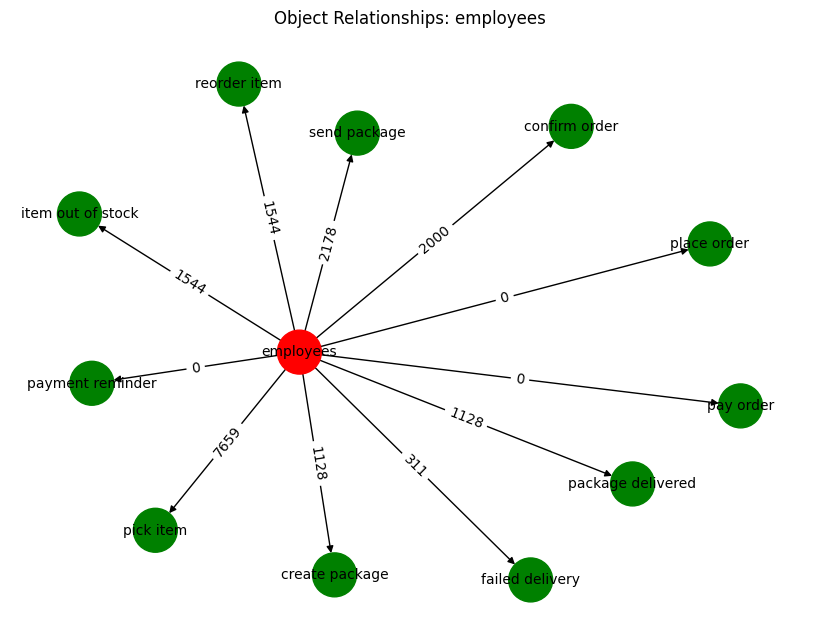

In [16]:
import networkx as nx
import matplotlib.pyplot as plt

from collections import defaultdict

grouped_results = defaultdict(list)
for obj_type, event_type, count in results:
    grouped_results[obj_type].append((event_type, count))

for obj_type, events in grouped_results.items():
    G = nx.DiGraph()

    G.add_node(obj_type, color='red')
    for event_type, count in events:
        G.add_node(event_type, color='green')
        G.add_edge(obj_type, event_type, weight=count)

    colors = [G.nodes[node]['color'] for node in G.nodes]

    pos = nx.spring_layout(G, seed=42)  # Layout for consistency
    edge_labels = nx.get_edge_attributes(G, 'weight')

    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, with_labels=True, node_color=colors, node_size=1000, font_size=10, arrows=True)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    plt.title(f"Object Relationships: {obj_type}")
    plt.show()


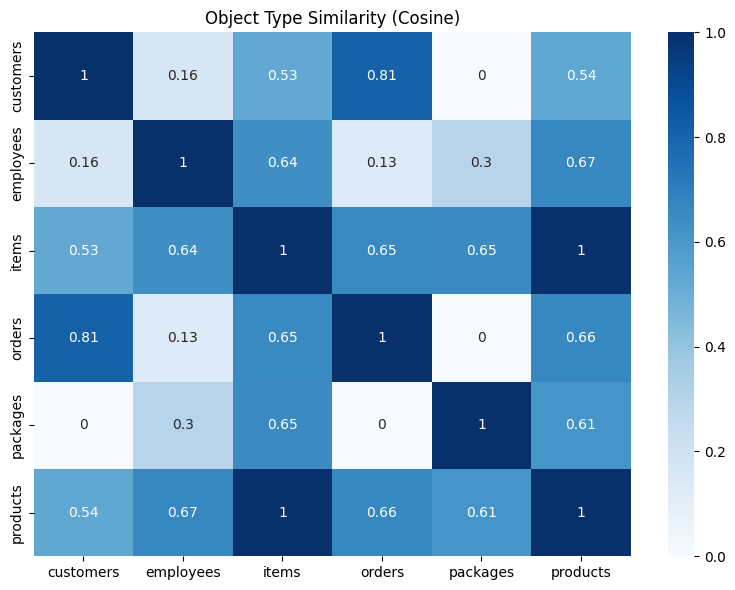

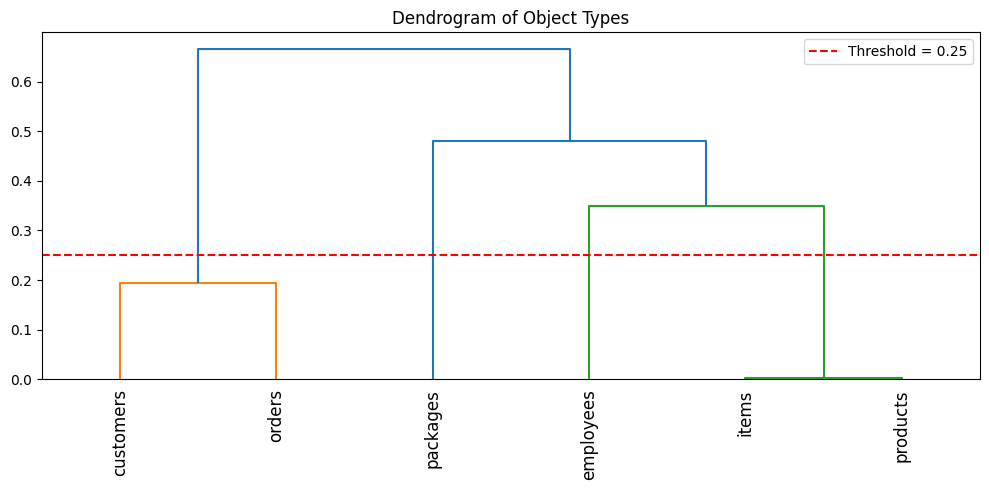


 Merged Object Groups Based on Similar Relationships:
Cluster 1: ['customers', 'orders']
Cluster 2: ['items', 'products']
Cluster 3: ['packages']
Cluster 4: ['employees']


/var/folders/zm/3q8nddss4qg11xgg8jn8lxc00000gn/T/ipykernel_72354/210214855.py:50: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grouped = norm_df.groupby("cluster").apply(lambda x: list(x.index)).tolist()


In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram

# threshold
THRESHOLD = 0.25

# STEP 1: Prepare pivot matrix
df = pd.DataFrame(results, columns=["object_type", "event_type", "count"])
pivot_df = df.pivot_table(index="object_type", columns="event_type", values="count", fill_value=0)

# STEP 2: Normalize each object vector (row-wise)
norm_df = pivot_df.div(pivot_df.sum(axis=1), axis=0)

# STEP 3: Similarity matrix visualization
similarity = cosine_similarity(norm_df)

plt.figure(figsize=(8, 6))
sns.heatmap(similarity, xticklabels=norm_df.index, yticklabels=norm_df.index, cmap='Blues', annot=True)
plt.title("Object Type Similarity (Cosine)")
plt.tight_layout()
plt.show()

# STEP 4: Dendrogram (optional visualization of hierarchy)
Z = linkage(norm_df, method='average', metric='cosine')

plt.figure(figsize=(10, 5))
dendrogram(Z, labels=norm_df.index.tolist(), leaf_rotation=90)
plt.axhline(y=THRESHOLD, color='red', linestyle='--', label=f'Threshold = {THRESHOLD}')
plt.legend()
plt.title("Dendrogram of Object Types")
plt.tight_layout()
plt.show()

# STEP 5: Perform clustering
clustering = AgglomerativeClustering(
    n_clusters=None,
    distance_threshold=THRESHOLD,
    metric='cosine',
    linkage='average'
)

clusters = clustering.fit_predict(norm_df)
norm_df["cluster"] = clusters

# STEP 6: Group and print merged object types
grouped = norm_df.groupby("cluster").apply(lambda x: list(x.index)).tolist()

print("\n Merged Object Groups Based on Similar Relationships:")
for i, group in enumerate(grouped):
    print(f"Cluster {i + 1}: {group}")


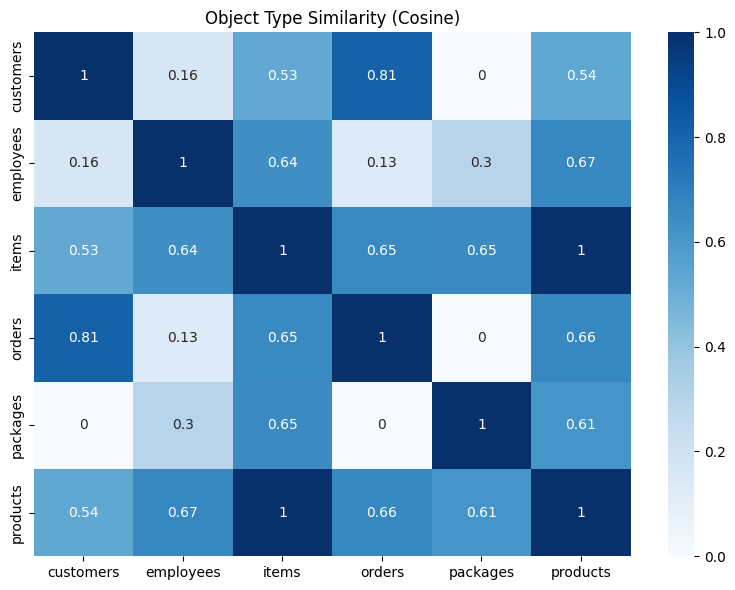

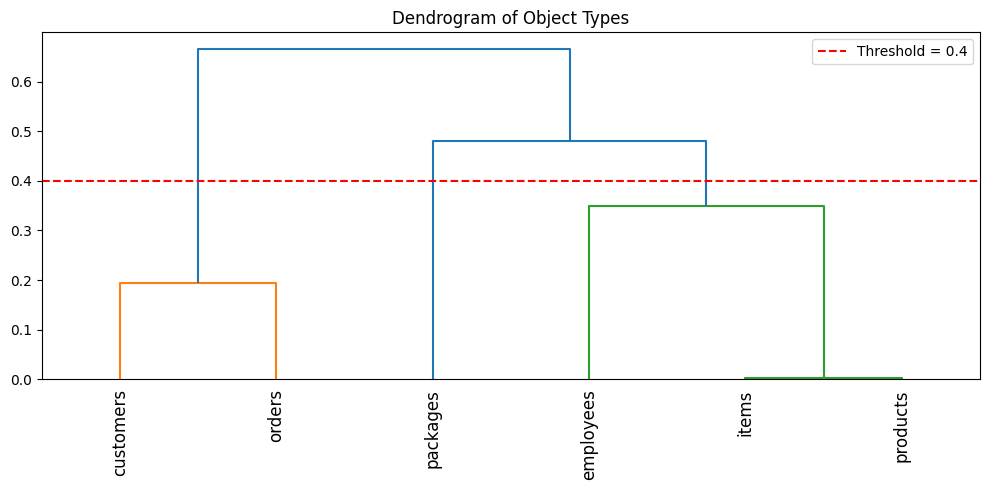


🔗 Merged Object Groups Based on Similar Relationships:
Cluster 1: ['employees', 'items', 'products']
Cluster 2: ['customers', 'orders']
Cluster 3: ['packages']


/var/folders/zm/3q8nddss4qg11xgg8jn8lxc00000gn/T/ipykernel_72354/3647316945.py:49: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grouped = norm_df.groupby("cluster").apply(lambda x: list(x.index)).tolist()
/var/folders/zm/3q8nddss4qg11xgg8jn8lxc00000gn/T/ipykernel_72354/3647316945.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


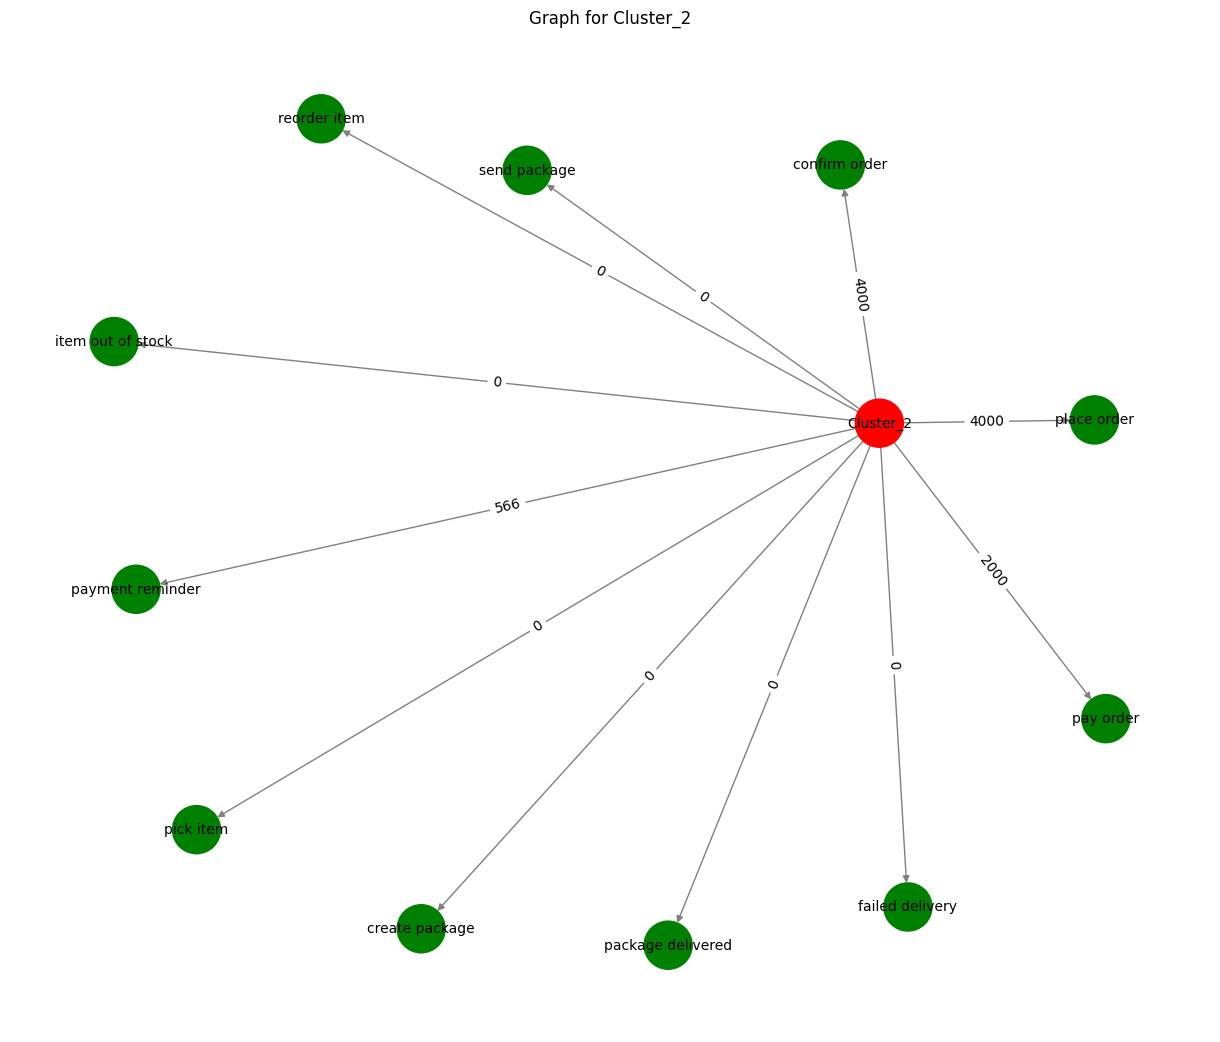

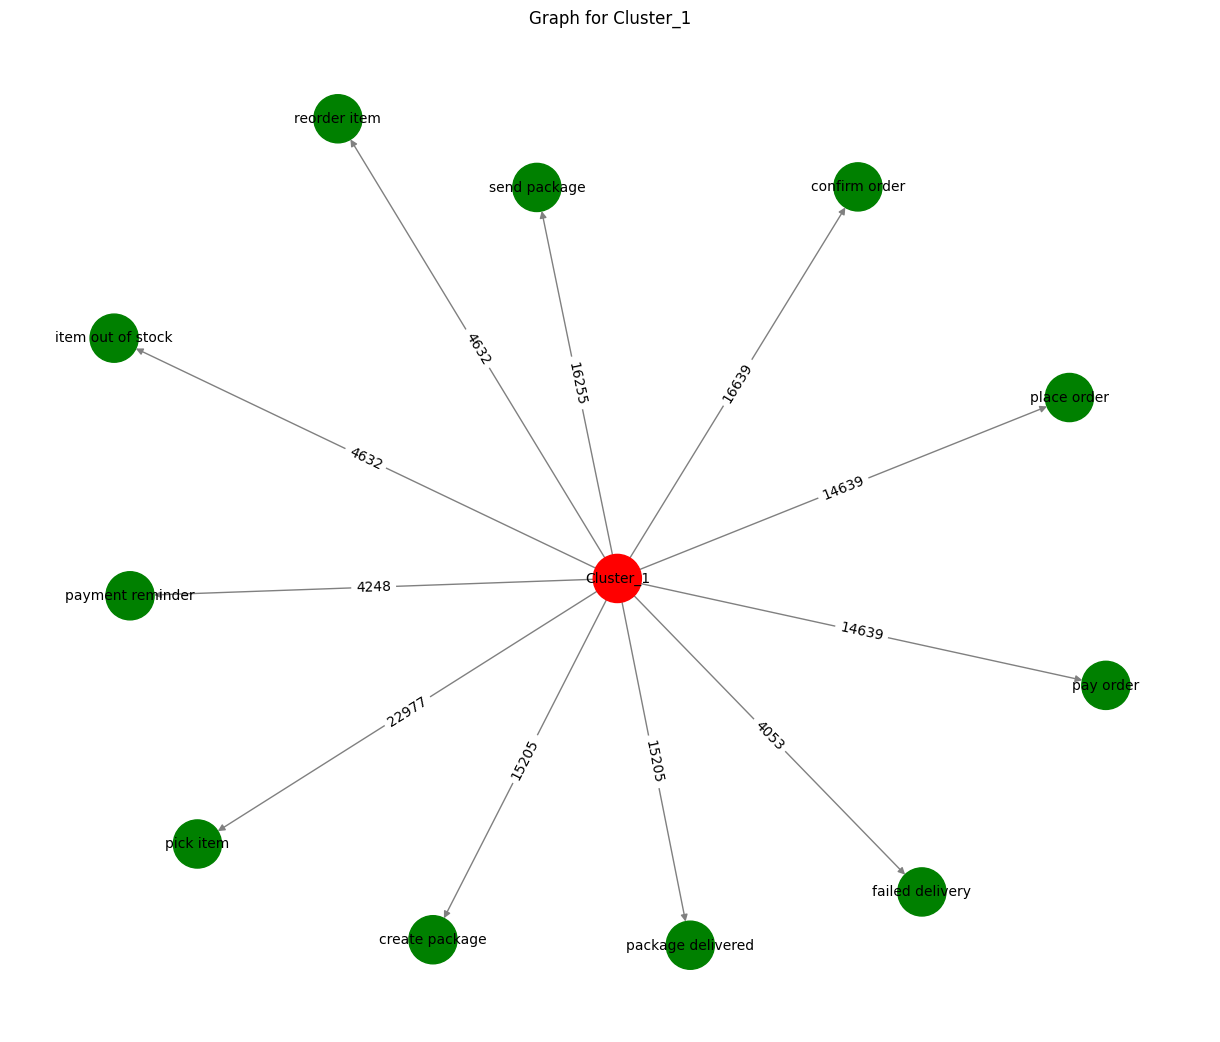

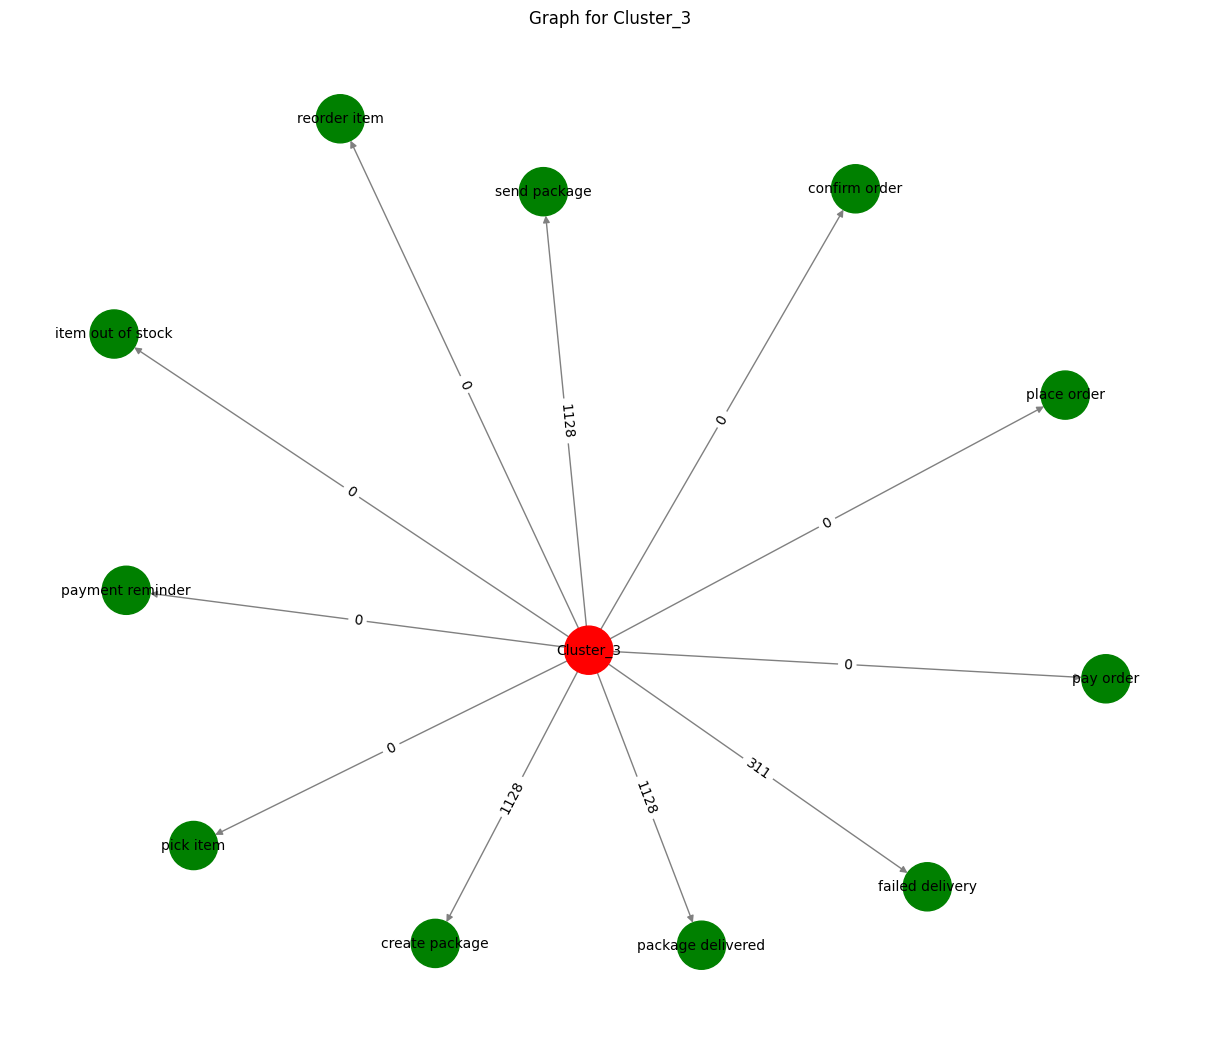

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering
import networkx as nx
from collections import defaultdict

# Step 0: Set your threshold (0 to 1) for how similar object types must be to merge
THRESHOLD = 0.4  # You can tune this

# Step 1: Build pivot table from (object_type, event_type, count)
df = pd.DataFrame(results, columns=["object_type", "event_type", "count"])
pivot_df = df.pivot_table(index="object_type", columns="event_type", values="count", fill_value=0)

# Step 2: Normalize to focus on pattern, not magnitude
norm_df = pivot_df.div(pivot_df.sum(axis=1), axis=0)

# Step 3: Optional visualization of similarity
similarity = cosine_similarity(norm_df)
plt.figure(figsize=(8, 6))
sns.heatmap(similarity, xticklabels=norm_df.index, yticklabels=norm_df.index, cmap='Blues', annot=True)
plt.title("Object Type Similarity (Cosine)")
plt.tight_layout()
plt.show()

# Step 4: Plot dendrogram to visualize clusters
Z = linkage(norm_df, method='average', metric='cosine')
plt.figure(figsize=(10, 5))
dendrogram(Z, labels=norm_df.index.tolist(), leaf_rotation=90)
plt.axhline(y=THRESHOLD, color='red', linestyle='--', label=f'Threshold = {THRESHOLD}')
plt.legend()
plt.title("Dendrogram of Object Types")
plt.tight_layout()
plt.show()

# Step 5: Apply Agglomerative Clustering
clustering = AgglomerativeClustering(
    n_clusters=None,
    distance_threshold=THRESHOLD,
    metric='cosine',
    linkage='average'
)
clusters = clustering.fit_predict(norm_df)

# Step 6: Group objects by cluster
norm_df["cluster"] = clusters
grouped = norm_df.groupby("cluster").apply(lambda x: list(x.index)).tolist()
print("\n🔗 Merged Object Groups Based on Similar Relationships:")
for i, group in enumerate(grouped):
    print(f"Cluster {i + 1}: {group}")

# Step 7: Map each object_type to its cluster
object_to_cluster = {}
for cluster_id, members in enumerate(grouped):
    for obj in members:
        object_to_cluster[obj] = f"Cluster_{cluster_id + 1}"

# Step 8: Aggregate relationship counts per cluster
cluster_event_count = defaultdict(lambda: defaultdict(int))
for obj_type, event_type, count in results:
    cluster = object_to_cluster.get(obj_type)
    if cluster:
        cluster_event_count[cluster][event_type] += count

# Step 9: Create and show graph for each cluster
for cluster_name, event_counts in cluster_event_count.items():
    G = nx.DiGraph()
    G.add_node(cluster_name, color='red')

    for event_type, weight in event_counts.items():
        G.add_node(event_type, color='green')
        G.add_edge(cluster_name, event_type, weight=weight)

    pos = nx.spring_layout(G, seed=42)
    node_colors = [G.nodes[n]['color'] for n in G.nodes]
    edge_labels = nx.get_edge_attributes(G, 'weight')

    plt.figure(figsize=(12, 10))
    nx.draw(G, pos, with_labels=True, node_color=node_colors, edge_color='gray', node_size=1200, font_size=10)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    plt.title(f"Graph for {cluster_name}")
    plt.tight_layout()
    plt.show()
